<a href="https://colab.research.google.com/github/frilham/frilham/blob/main/Tubes_AI_(Algoritma_Na%C3%AFve_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar Pengantar Kecerdasan Buatan dan Sistem Cerdas
Assesment CLO-3

**Kelas IF-45-04**

**Kelompok 3**

**Ketua     :** Fathan Askar - 1301213374

**Anggota   :** 

Muhammad Ilham Hakim Somantri - 1301210330

Farhan Faturahman - 1301213188

Fajari Salim Hanri - 1301213299

Algoritma Learning yang digunakan yaitu **Algoritma kNN** dan **Algoritma Naïve Bayes**

Berikut adalah Google Colab **Algoritma Naïve Bayes**


# Dataset

In [ ]:
!pip install openpyxl
!pip install pandas
!pip install numpy
!pip install math
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def read_excel(path, sheet_target): # read excel data
    data = pd.read_excel(path, sheet_name=sheet_target)
    return pd.DataFrame(data)

In [ ]:
dwn_url = 'https://drive.google.com/uc?export=download&id=1JAETfbmhgCo2XpPP6C0yGG0M7N73W7BU'
data = read_excel(dwn_url,sheet_target="arrhythmia")
data

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,1,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,5,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,0,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,0,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


# Dataset Exploration

In [ ]:
data.head()

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,1,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,5,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 281 entries, No to Class
dtypes: float64(120), int64(156), object(5)
memory usage: 992.4+ KB


In [ ]:
data.columns.values

array(['No', 'age', 'sex', 'height', 'weight', 'qrsDur', 'prInterval',
       'qtInterval', 'tInterval', 'pInterval', 'QRS', 'T', 'P', 'QRST',
       'J', 'heartRate', 'ofChannelDI1', 'ofChannelDI2', 'ofChannelDI3',
       'ofChannelDI4', 'ofChannelDI5', 'ofChannelDI6', 'ofChannelDI7',
       'ofChannelDI8', 'ofChannelDI9', 'ofChannelDI10', 'ofChannelDI11',
       'ofChannelDI12', 'ofChannelDII1', 'ofChannelDII2', 'ofChannelDII3',
       'ofChannelDII4', 'ofChannelDII5', 'ofChannelDII6', 'ofChannelDII7',
       'ofChannelDII8', 'ofChannelDII9', 'ofChannelDII10',
       'ofChannelDII11', 'ofChannelDII12', 'ofChannelDIII1',
       'ofChannelDIII2', 'ofChannelDIII3', 'ofChannelDIII4',
       'ofChannelDIII5', 'ofChannelDIII6', 'ofChannelDIII7',
       'ofChannelDIII8', 'ofChannelDIII9', 'ofChannelDIII10',
       'ofChannelDIII11', 'ofChannelDIII12', 'ofChannelAVR1',
       'ofChannelAVR2', 'ofChannelAVR3', 'ofChannelAVR4', 'ofChannelAVR5',
       'ofChannelAVR6', 'ofChannelAVR7', 'ofChann

In [ ]:
data.Class.unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [ ]:
data.Class.info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Class
Non-Null Count  Dtype
--------------  -----
452 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
data.describe()

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,130.625419,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,1.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,113.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,226.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,339.250000,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,452.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
data.shape

(452, 281)

<Axes: >

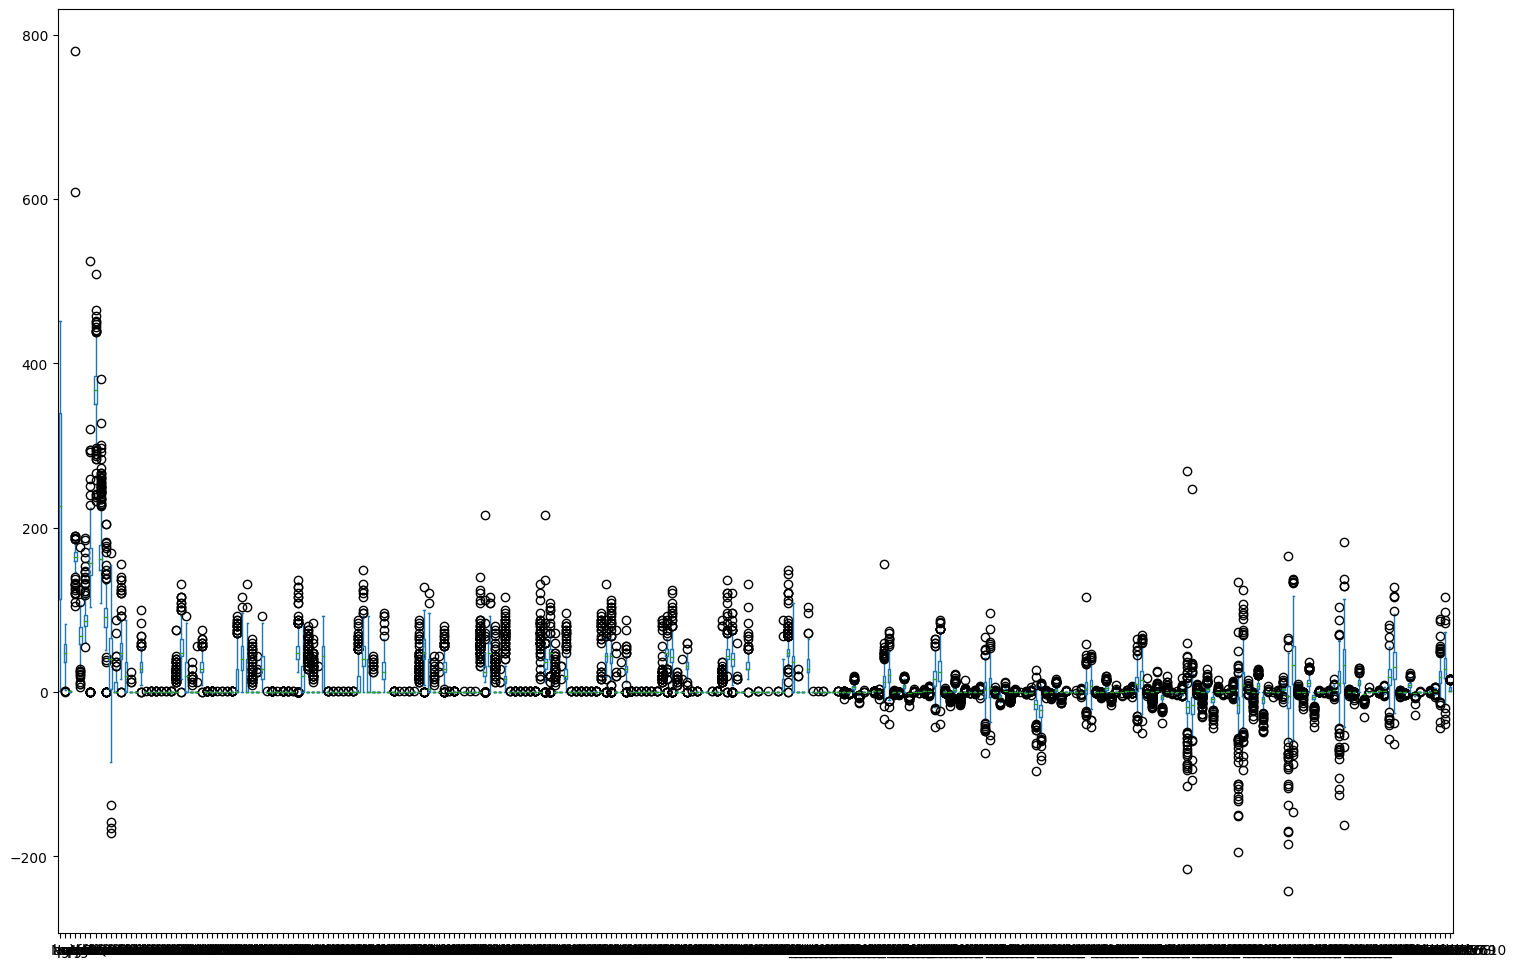

In [ ]:
#Ini merupakan boxplot dari datanya
#Kita bisa melihat bahwa banyak sekali data outlier pada data berikut, maka kami harus melakukan pembersihan data terdahulu
data.plot(kind='box',figsize = (18,12))

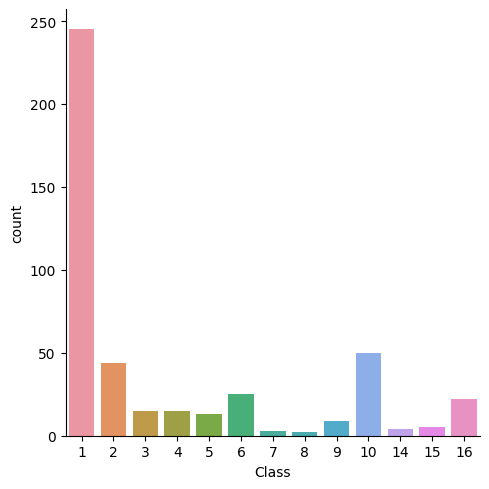

In [ ]:
#Melihat jumlah data setiap Class
#Dari sini kita bisa melihat bahwa jumalah data class 7, 8, 14, 15 sangat sedikit dibandingkan data yang lain untunk diproses saat dimasukkan ke dalam modul learning 
#Dari sini kita bisa melihat bahwa jumalah data class 1 sangat banyak dibandingkan data yang lain untunk diproses saat dimasukkan ke dalam modul learning naive bayes

sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
#drop row yang datanya kurang dari 5
data = data[data['Class'] != 7] 
data = data[data['Class'] != 8]
data = data[data['Class'] != 14]
data = data[data['Class'] != 15]

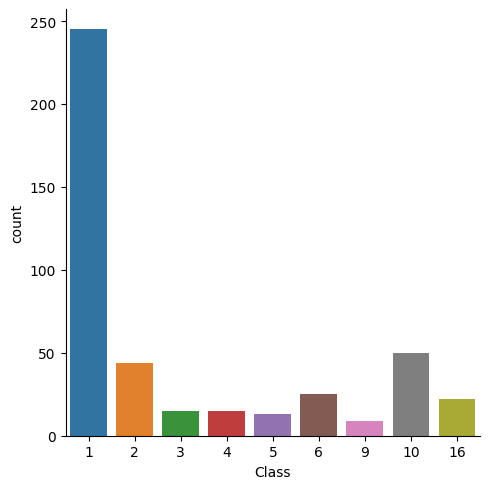

In [ ]:
#Melihat jumlah data setiap Class, setelah class yang kurang dari 5 di keluarkan 
sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

# Data Pre-Processing

In [ ]:
def missing_val_into_mean(data, missing_marker='?'):
  for column in data.columns:
    data[column] = data[column].replace(missing_marker,np.nan)
    data[column] = pd.to_numeric(data[column])
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace = True)
  return data
data = missing_val_into_mean(data, missing_marker='?')
data
#print(data)

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
6,7,40,1,160,52,77,129,377,133,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,8,49,1,162,54,78,0,376,157,70,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,0,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,0,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
#drop row yang datanya kurang dari 5, ganti sex 0 jadi 2 biar gk ke drop di atas 30 persen 0nya
data = data[data['Class'] != 7] 
data = data[data['Class'] != 8]
data = data[data['Class'] != 14]
data = data[data['Class'] != 15]
data['sex'] = data['sex'].replace(0, 2)

In [ ]:
# Cleaning Data
# Mengedrop data frame yang memiliki missing value/"?"/0/0.0/.0 diatas 30% / 0.3
data = data.drop('No',axis=1)
data = data.drop('J',axis=1)

def drop_columns_with_high_zero_frequency(data, threshold=0.3):
    columns_to_drop = []
    tot = 0
    for column in data.columns:
        zero_count = (data[column] == 0).sum() | (data[column] == '0.0').sum() | (data[column] == '.0').sum()
        zero_frequency = zero_count / len(data)
        if zero_frequency >= threshold:
            tot+=1
            columns_to_drop.append(column)

    data.drop(columns_to_drop, axis=1, inplace=True)
    print(tot)
    return data

data = drop_columns_with_high_zero_frequency(data, threshold=0.3)
print(data)

159
     age  sex  height  weight  qrsDur  prInterval  qtInterval  tInterval  \
1     56    1     165      64      81         174         401        149   
2     54    2     172      95     138         163         386        185   
3     55    2     175      94     100         202         380        179   
6     40    1     160      52      77         129         377        133   
7     49    1     162      54      78           0         376        157   
..   ...  ...     ...     ...     ...         ...         ...        ...   
447   53    1     160      70      80         199         382        154   
448   37    2     190      85     100         137         361        201   
449   36    2     166      68     108         176         365        194   
450   32    1     155      55      93         106         386        218   
451   78    1     160      70      79         127         364        138   

     pInterval  QRS  ...  _2ofChannelV58  _2ofChannelV59  _2ofChannelV510  \
1     

In [ ]:
#membuat Class menjadi 2 yaitu 0 untuk sakit arrhytmia, 1 untuk sehat
data['Class'] = data['Class'].apply(lambda x: 0 if x != 1 else x)

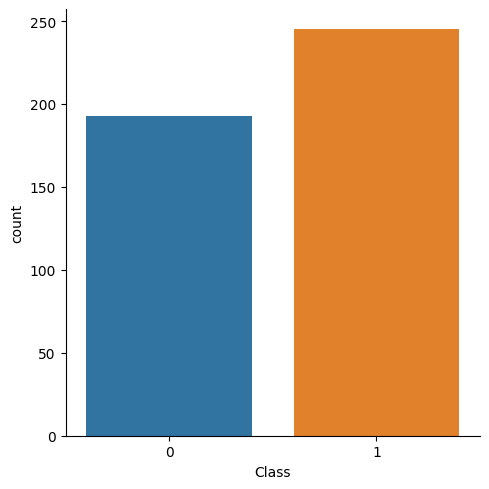

In [ ]:
#Melihat jumlah data setiap Class, setelah class menjadi 2
sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
data.sex

1      1
2      2
3      2
6      1
7      1
      ..
447    1
448    2
449    2
450    1
451    1
Name: sex, Length: 438, dtype: int64

In [ ]:
data

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,56,1,165,64,81,174,401,149,39,25,...,2.6,21.6,43.4,-0.5,8.5,0.2,2.1,20.4,38.8,0
2,54,2,172,95,138,163,386,185,102,96,...,3.4,11.5,48.2,0.9,9.5,0.3,3.4,12.3,49.0,0
3,55,2,175,94,100,202,380,179,143,28,...,3.0,36.8,68.0,0.1,12.2,0.4,2.6,34.6,61.6,1
6,40,1,160,52,77,129,377,133,77,77,...,1.3,9.3,18.9,-0.4,6.5,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.8,14.5,20.9,-0.3,8.2,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,1.0,-8.4,-0.6,0.0,4.3,0.7,0.6,-4.4,-0.5,1
448,37,2,190,85,100,137,361,201,73,86,...,3.7,50.7,82.5,-0.5,15.6,0.4,2.4,38.0,62.4,0
449,36,2,166,68,108,176,365,194,116,-85,...,-2.5,-39.6,-63.6,1.2,16.3,1.5,1.0,-44.2,-33.2,0
450,32,1,155,55,93,106,386,218,63,54,...,3.2,29.7,61.0,0.2,12.0,0.5,2.4,25.0,46.6,1


In [ ]:
# data = data.sample(452).reset_index(drop=True) #untuk shuffle data biar gk terurut (gaperlu sih udah ga terurut dari sononya)
# data

In [ ]:
fold1 = (data.iloc[0:225].reset_index(drop=True), data.iloc[225:451].reset_index(drop=True))
fold2 = (data.iloc[151:301].reset_index(drop=True), pd.concat([data.iloc[0:151],data.iloc[301:451]]).reset_index(drop=True))  
fold3 = (data.iloc[351:451].reset_index(drop=True), data.iloc[0:351].reset_index(drop=True))

In [ ]:
def normalize_data(data):
    data = (data-data.min())/(data.max()-data.min())
    return data

y = data.Class
X = data.drop('Class',axis=1)

print(normalize_data(X))

          age  sex    height    weight    qrsDur  prInterval  qtInterval  \
1    0.674699  0.0  0.088889  0.341176  0.195489    0.332061    0.610108   
2    0.650602  1.0  0.099259  0.523529  0.624060    0.311069    0.555957   
3    0.662651  1.0  0.103704  0.517647  0.338346    0.385496    0.534296   
6    0.481928  0.0  0.081481  0.270588  0.165414    0.246183    0.523466   
7    0.590361  0.0  0.084444  0.282353  0.172932    0.000000    0.519856   
..        ...  ...       ...       ...       ...         ...         ...   
447  0.638554  0.0  0.081481  0.376471  0.187970    0.379771    0.541516   
448  0.445783  1.0  0.125926  0.464706  0.338346    0.261450    0.465704   
449  0.433735  1.0  0.090370  0.364706  0.398496    0.335878    0.480144   
450  0.385542  0.0  0.074074  0.288235  0.285714    0.202290    0.555957   
451  0.939759  0.0  0.081481  0.376471  0.180451    0.242366    0.476534   

     tInterval  pInterval       QRS  ...  _2ofChannelV57  _2ofChannelV58  \
1     0.150

In [ ]:
def standardize_data(data):
    return (data - data.mean()) / data.std()
y = data.Class
X = data.drop('Class', axis=1)

standardized_X = standardize_data(X)
print(standardized_X)

          age       sex    height    weight    qrsDur  prInterval  qtInterval  \
1    0.590890 -0.890655 -0.032077 -0.250883 -0.502185    0.415899    0.998953   
2    0.467998  1.120206  0.153835  1.617737  3.197296    0.154852    0.549978   
3    0.529444  1.120206  0.233511  1.557459  0.730976    1.080385    0.370387   
6   -0.392243 -0.890655 -0.164871 -0.974220 -0.761797   -0.652024    0.280592   
7    0.160769 -0.890655 -0.111753 -0.853664 -0.696894   -3.713403    0.250661   
..        ...       ...       ...       ...       ...         ...         ...   
447  0.406552 -0.890655 -0.164871  0.110785 -0.567088    1.009190    0.430251   
448 -0.576581  1.120206  0.631893  1.014956  0.730976   -0.462171   -0.198314   
449 -0.638026  1.120206 -0.005518 -0.009771  1.250201    0.463363   -0.078588   
450 -0.883810 -0.890655 -0.297664 -0.793386  0.276653   -1.197851    0.549978   
451  1.942698 -0.890655 -0.164871  0.110785 -0.631991   -0.699487   -0.108519   

     tInterval  pInterval  

# Algoritma Naïve Bayes

In [ ]:
def separate_data_by_class(data):
    separated_data = {}
    separated_data['class_1'] = data[data['Class'] == 1]
    separated_data['class_not_1'] = data[data['Class'] != 1]
    return separated_data

separated_data = separate_data_by_class(data)

class_normal = separated_data['class_1']
class_sick = separated_data['class_not_1']
print(class_normal)
print(class_sick)

     age  sex  height  weight  qrsDur  prInterval  qtInterval  tInterval  \
3     55    2     175      94     100         202         380        179   
6     40    1     160      52      77         129         377        133   
7     49    1     162      54      78           0         376        157   
8     44    2     168      56      84         118         354        160   
11    45    1     165      86      77         143         373        150   
..   ...  ...     ...     ...     ...         ...         ...        ...   
445   45    2     175      75      91         134         376        160   
446   20    1     157      57      81         151         363        166   
447   53    1     160      70      80         199         382        154   
450   32    1     155      55      93         106         386        218   
451   78    1     160      70      79         127         364        138   

     pInterval  QRS  ...  _2ofChannelV58  _2ofChannelV59  _2ofChannelV510  \
3         

In [ ]:
def count_mean_for_every_column(data):
    means = {}
    for column in data.columns:
        means[column] = data[column].mean()
    return means

cmean_normal = count_mean_for_every_column(class_normal)
cmean_sick = count_mean_for_every_column(class_sick)

In [ ]:
def find_standard_deviation(data):
    return data.std()

cstd_normal = find_standard_deviation(class_normal)
cstd_sick = find_standard_deviation(class_sick)

In [ ]:
def calculate_probability(mean, std, x) :
    std +=1
    exponent = math.exp(-(((x)-(mean))**2) / (2*((std)**2)))
    return (1 / (math.sqrt(2*math.pi) * std)) * exponent

In [ ]:
def confussionMatrix(result):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    x = True

    for i in result:
        if(i['Ground Truth'] == '?'):
            x = False
            break
        elif((i['Prediction Result'] == 1)and(i['Prediction Result'] == i['Ground Truth'])):
            TP += 1
        elif((i['Prediction Result'] == 0)and(i['Prediction Result'] == i['Ground Truth'])):
            TN += 1
        elif((i['Prediction Result'] == 1)and(i['Prediction Result'] != i['Ground Truth'])):
            FP += 1
        elif((i['Prediction Result'] == 0)and(i['Prediction Result'] != i['Ground Truth'])):
            FN += 1
        
    if(x):
        print(f"\nTP : {TP} FP : {FP}\nTN : {TN} FN : {FN}")
        print(f"Accuracy : {((TP+TN)/(TP+TN+FP+FN))*100}%")
        print(f"Precission : {((TP)/(TP+FP))*100}%")
        print(f"Recall : {((TP)/(TP+FN))*100}%")
    else:
        print("\nCannot process the confussion matrix with unknown Ground Truth!")

In [ ]:
def doPrediction(normalMean, normalStd, sickMean, sickStd, target, columnTarget, truthColumn):
  result = []
  for i in range(len(target)):
     normalResult = 1
     sickResult = 1
     for column in columnTarget:
      normalResult *= calculate_probability(normalMean[column], normalStd[column], target[column].iloc[i])
      sickResult *= calculate_probability(sickMean[column], sickStd[column], target[column].iloc[i])
     if sickResult > normalResult:
      prediction = 0
     else:
      prediction = 1
     result.append({'ID' : i,
                    'Normal Probability' : "{}".format(normalResult),
                    'Sick Probability' : "{}".format(sickResult),
                    'Prediction Result' : prediction,
                    'Ground Truth' : target[truthColumn].iloc[i]})
  return result

In [ ]:
target = data
result = doPrediction(cmean_normal, cstd_normal, cmean_sick, cstd_sick, target, list(data.columns.values), truthColumn='Class')

for p in result:
    print(p)

confussionMatrix(result)

{'ID': 0, 'Normal Probability': '3.978942671711832e-150', 'Sick Probability': '7.970559777516747e-166', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 1, 'Normal Probability': '1.189346236908443e-207', 'Sick Probability': '6.567221475407216e-181', 'Prediction Result': 0, 'Ground Truth': 0}
{'ID': 2, 'Normal Probability': '2.0778403208729943e-160', 'Sick Probability': '2.72979361381702e-172', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 3, 'Normal Probability': '7.2487466675669485e-155', 'Sick Probability': '6.463689782450063e-167', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 4, 'Normal Probability': '1.676035407197551e-153', 'Sick Probability': '8.540199536828688e-169', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 5, 'Normal Probability': '7.905966357674217e-155', 'Sick Probability': '1.6706172845425874e-168', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 6, 'Normal Probability': '2.9644998644534696e-158', 'Sick Probability': '3.528347568324709e-167', 'Prediction